# Lab 4: Building a Spotify Song Classifier with KNNs and Decision Trees
**Classify by genres**. In this lab, you will build machine learning genre classifiers using a dataset of Spotify tracks. Your goal is to train a model that can distinguish between two selected genres based on various audio features such as danceability, energy, valence, tempo, and more.

We'll follow the familiar workflow of data exploration -> preprocessing -> model training -> evaluation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Step 1: The data
We'll focus on two genres: Blues and Jazz (what’s the difference, anyway??).

Both genres have rich musical histories, but they differ in structure:

- Blues tends to have simpler chord progressions and a strong emotional expression.
- Jazz often involves complex improvisation and more varied rhythms.

But can a machine really tell them apart just by looking at numerical audio features? That’s what we’ll find out!

In this step, you will:
- Load the dataset
- Extract only blues and jazz for classification

In [2]:
spotify_data = pd.read_csv('/courses/EDS232/Data/spotify_dat.csv')

In [3]:
# Print the data types in spotify_data
print(f'The data types in spotify_data are:\n{spotify_data.dtypes}')

The data types in spotify_data are:
id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
genres               object
dtype: object


In [4]:
# Explore data
spotify_data.head(3)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,genres
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02,rap metal
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02,rap metal
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.0234,0.000002,0.122,0.370,149.749,298893,4.0,1999,1999-11-02,rap metal


In [5]:
# Explore genre labels
#spotify_data['genres'].unique()

In [6]:
# Filter down to two genres
blues_data = spotify_data[spotify_data['genres'] == 'jazz']
jazz_data =  spotify_data[spotify_data['genres'] == 'blues']

# Combine both genres into one dataset
combined_data =  pd.concat([blues_data, jazz_data])

In [7]:
# Examine combined_data
combined_data.head(3)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,genres
9370,2gUvAgzcah09iRarSf62fN,Everything I Love,Blue Waltz,4ieAxUV4WFZj9imsPVehYa,"['Enrico Pieranunzi', 'Thomas Fonnesbæk']","['5vACdMa2kY7jHnlJwqYRKP', '2GWMZZQNuU0VZra0su...",1,1,False,0.461,...,0.954,0.861,0.984,0.249,111.621,400576,4.0,2018,2018-07-13,jazz
9371,5BWzVgoB7GF0GoPleZwlg0,Blue Waltz,Blue Waltz,4ieAxUV4WFZj9imsPVehYa,"['Enrico Pieranunzi', 'Thomas Fonnesbæk']","['5vACdMa2kY7jHnlJwqYRKP', '2GWMZZQNuU0VZra0su...",2,1,False,0.425,...,0.941,0.899,0.717,0.304,105.492,533556,4.0,2018,2018-07-13,jazz
9372,16EJtLHY51K46GULZjrSUc,Come Rose Dai Muri,Blue Waltz,4ieAxUV4WFZj9imsPVehYa,"['Enrico Pieranunzi', 'Thomas Fonnesbæk']","['5vACdMa2kY7jHnlJwqYRKP', '2GWMZZQNuU0VZra0su...",3,1,False,0.391,...,0.907,0.902,0.698,0.267,109.899,422782,4.0,2018,2018-07-13,jazz


In [8]:
# Rename 'genres' column to 'genre' for clarity
combined_data = combined_data.rename(columns={'genres': 'genre'})

In [9]:
# Double Check
combined_data.head(1)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,genre
9370,2gUvAgzcah09iRarSf62fN,Everything I Love,Blue Waltz,4ieAxUV4WFZj9imsPVehYa,"['Enrico Pieranunzi', 'Thomas Fonnesbæk']","['5vACdMa2kY7jHnlJwqYRKP', '2GWMZZQNuU0VZra0su...",1,1,False,0.461,...,0.954,0.861,0.984,0.249,111.621,400576,4.0,2018,2018-07-13,jazz


## Step 2: Data Exploration
Now that we have Blues and Jazz as our two genres, it's time to explore the data and look for patterns in the audio features.

Let's investigate:
- Which features are available?
- How strongly these features correlate with each other.
- How different genres distribute across  sample features: danceability 

In this step, we will:
- Filter out non-numeric columns before the plotting
- Visualize feature correlations using a heatmap.
- Examine key feature distributions with histograms to see if genres behave differently.


In [10]:
# See all column names
pd.set_option('display.max_columns', None)

combined_data.head(1)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,genre
9370,2gUvAgzcah09iRarSf62fN,Everything I Love,Blue Waltz,4ieAxUV4WFZj9imsPVehYa,"['Enrico Pieranunzi', 'Thomas Fonnesbæk']","['5vACdMa2kY7jHnlJwqYRKP', '2GWMZZQNuU0VZra0su...",1,1,False,0.461,0.331,8,-18.589,1,0.0415,0.954,0.861,0.984,0.249,111.621,400576,4.0,2018,2018-07-13,jazz


In [11]:
# List all non-numerica columns
combined_data.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
genre                object
dtype: object

The numeric columns are: track_number, disc_number, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, year, release_date.

In [12]:
# Exclude non-numeric columns but keep 'genre' for grouping
numeric_features = combined_data.select_dtypes(include=['number']).copy()

# Keep genre
numeric_features.loc[:, 'genre'] = combined_data['genre']

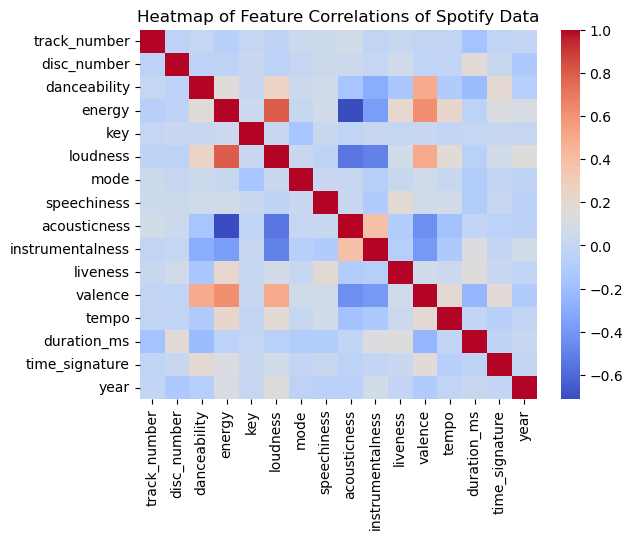

In [13]:
# Correlation heatmap
# Calculate correlation matrix
corr_matrix = numeric_features.drop('genre', axis = 1).corr() # Ensure all columns are numeric

# Create the heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title(label = "Heatmap of Feature Correlations of Spotify Data")
plt.show()

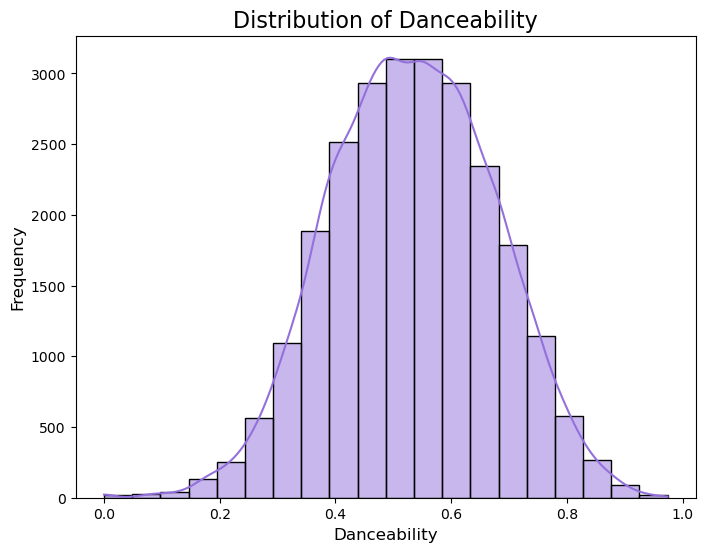

In [14]:
# Histogram of danceability
# Plot histogram of 'danceability' without grouping by 'genre'
plt.figure(figsize=(8, 6))
sns.histplot(data=combined_data, x='danceability', kde=True, bins=20, color = 'mediumpurple')
plt.title('Distribution of Danceability', fontsize=16)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Step 3: Check for class imbalance
An unequal distribution between the target classes can cause issues for our classifiers, so we'll need to check for that. A commonly used guideline for class imbalance is:

- Slight Imbalance (Less than 1.5:1) → Generally okay; no need for balancing.
- Moderate Imbalance (Between 1.5:1 and 3:1) → Might cause some bias; balancing can help.
- Severe Imbalance (More than 3:1) → Strongly affects model performance; balancing is usually necessary.

In [15]:
# Print counts of each genre
class_counts = numeric_features['genre'].value_counts()

# Calculate ratio of majority to minority class
majority_class = class_counts.max()
minority_class = class_counts.min()
class_ratio = majority_class / minority_class

# Print class distribution and ratio
print(f"Class counts: {class_counts}")
print(f"\nClass ratio: {class_ratio:.3f}")

Class counts: genre
blues    14811
jazz     10023
Name: count, dtype: int64

Class ratio: 1.478


Given this result, should we be worried about the imbalance?

The class ratio I calculated is 1.478. This result is slightly less than a 1.5:1 ratio - indicating a slight imbalance. (As stated above - this imbalance is generally ok, and is not necessary to rebalance.) Thus, we do not have to be worried about the data imbalance.

### Step 4: Preprocessing
We need to ensure all the variables we use are numerical so the models can process them. First we'll drop all the variables that are not numeric or the target. Then we'll use a sklearn utility, `LabelEncoder()` to encode our categorical target variable into numerical values. Print the first five values of your encoded labels.

In [16]:
# Define the features (drop columns that are not numeric or target)
X = numeric_features.drop('genre', axis = 1)

# Set the target variable as 'genre'
y =  numeric_features['genre']

# Encode the target variable ('label') using label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print first five values of encoded labels
print(f"First 5 encoded label values: {y_encoded[1:6]}")

First 5 encoded label values: [1 1 1 1 1]


Good, now we'll do our data splitting and scaling.  Let's go with an 80/20 split this time.

In [17]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size = 0.2)

# Initialize the scaler
scaler = StandardScaler() 

# Fit and transform only the training set
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test)

### Step 5: Train the models
OK, now it's time to build our models and assess the training accuracy. We'll use the default of k = 5 for the KNN model.

In [18]:
# Initialize models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# Train (fit) both models
knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

# Predictions on training data
knn_y_pred_scaled = knn.predict(X_train_scaled)
dt_y_pred_scaled = dt.predict(X_train_scaled)

# Compute training accuracy
knn_train_accuracy = accuracy_score(y_train, knn_y_pred_scaled)
dt_train_accuracy = accuracy_score(y_train, dt_y_pred_scaled)

#Print training accuracy for both models
print(f"Accuracy score of train knn model {knn_train_accuracy}")
print(f"\nAccuracy score of train dt model {dt_train_accuracy}")

Accuracy score of train knn model 0.9190617607087129

Accuracy score of train dt model 1.0


### Step 6: Evaluate models
OK, now let's go ahead and predict on the test data to see how well our models do at predicting the genre of unseen tracks.

In [19]:
# Make predictions
knn_pred = knn.predict(X_test_scaled)
dt_pred = dt.predict(X_test_scaled)

# Evaluate prediction accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

#Print prediction accuracy for both models
print(f"Accuracy score of test knn model {knn_accuracy}")
print(f"\nAccuracy score of test dt model {dt_accuracy}")

Accuracy score of test knn model 0.8979263136702235

Accuracy score of test dt model 0.8524260116770687


### Step 7: Visualizing Model Performance
Now that we have evaluated our models on unseen data, let’s compare their performance by visualizing the training vs. test accuracy.  We'll look for signs of overfitting by plotting the training accuracy and test accuracy for both k-NN and Decision Trees.

Create a bar chart that compares the training accuracy and test accuracy for k-NN and Decision Trees. Your plot should clearly display:

- The training and test accuracy for both models.
- Properly labeled axes and a title.
- A legend to differentiate training and test accuracy.
- Accuracy values displayed on top of each bar.

In [20]:
# Create DataFrames
df_test = pd.DataFrame([['knn', knn_accuracy], ['dt', dt_accuracy]], columns = ['Method', 'Value'])
df_train = pd.DataFrame([['knn', knn_train_accuracy], ['dt', dt_train_accuracy]], columns = ['Method', 'Value'])

In [21]:
# Merge into one dataframe
df_train_test = pd.merge(df_test, df_train, on = 'Method')

In [22]:
# Look at merged df
#df_train_test.head()

# Rename columns appropriately
df_train_test = df_train_test.rename(columns={"Value_x": "Test", "Value_y": "Train"})

<function matplotlib.pyplot.show(close=None, block=None)>

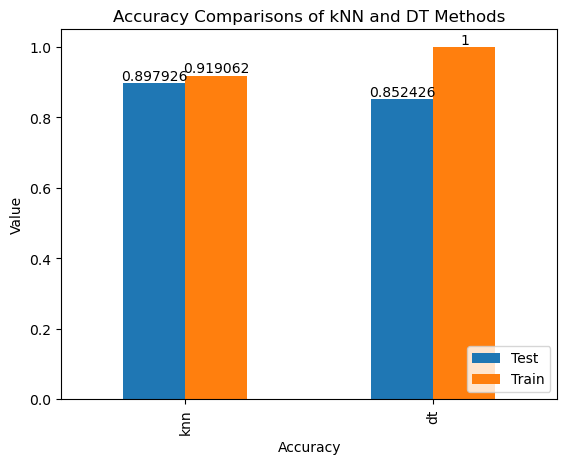

In [23]:
# Plot Merged Dataframe

# Initialize figure
ax = df_train_test.plot.bar()

# Add title
ax.set_title('Accuracy Comparisons of kNN and DT Methods')

# Set axis labels
ax.set_xlabel('Accuracy')
ax.set_ylabel('Value')

# Set tick labels
ax.set_xticklabels(df_train['Method'])

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container) 
                 
# Set legend values
ax.legend(loc = 'lower right')

# Show plot
plt.show

Which model does a better job of generalizing to unseen data? How do you know?
Does it appear that either of the models are overfitting? Why?

The model that does a better job of generalizing to unseen data is the kNN model. I arrived at this conclusion, as the kNN model accuracy score on test data is slightly higher than the dt model - despite the reverse being true in the training data. Due to the accuracy score of 1, on the training data, for the dt model - and the discrepancy with the lower score on the testing data - it would appear that the dt model is overfitted. Therefore, it's error due to variance must be high - as it appears sensitive to small fluctuactions in the training data.

### Bonus question
In the workflow above, we used the default parameter values of k = 5 for the KNN model, and maxdepth = None for the Decision Tree. Choose one of the models and see if you can improve test performance by optmizing its corresponding parameter value.

In [24]:
# Let's try to see if we can improve the DT test accuracy score (and reduce overfitting)

# To overcome some of the variance bias, let's reduce our maxdepth - and choose an optimal parameter value

# Max depths to iterate over
max_depths = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
accuracies = []

# Create decision tree model for different depths and report accuracies
for depth in max_depths:
    dt_improve = DecisionTreeClassifier(max_depth=depth, random_state = 42)
    dt_improve.fit(X_train_scaled, y_train)
    
    # Make predictions and calculate accuracy
    y_pred_improve = dt_improve.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_improve)
    accuracies.append(accuracy)
    
    print(f"Max Depth: {depth} - Accuracy: {accuracy:.10f}")

Max Depth: 1 - Accuracy: 0.8151801892
Max Depth: 2 - Accuracy: 0.8290718744
Max Depth: 3 - Accuracy: 0.8310851621
Max Depth: 4 - Accuracy: 0.8520233541
Max Depth: 5 - Accuracy: 0.8600765049
Max Depth: 6 - Accuracy: 0.8711495873
Max Depth: 7 - Accuracy: 0.8783974230
Max Depth: 8 - Accuracy: 0.8822226696
Max Depth: 9 - Accuracy: 0.8838332998
Max Depth: 10 - Accuracy: 0.8806120395
Max Depth: 11 - Accuracy: 0.8792027381
Max Depth: 12 - Accuracy: 0.8747735051
Max Depth: 13 - Accuracy: 0.8697402859
Max Depth: 14 - Accuracy: 0.8731628750
Max Depth: 15 - Accuracy: 0.8663176968


In [25]:
max_id = np.argmax(accuracies)
print(f"The Peak is at (x,y)=({max_depths[max_id]},{accuracies[max_id]})")

The Peak is at (x,y)=(9,0.8838332997785383)


Text(0, 0.5, 'Accuracy Score')

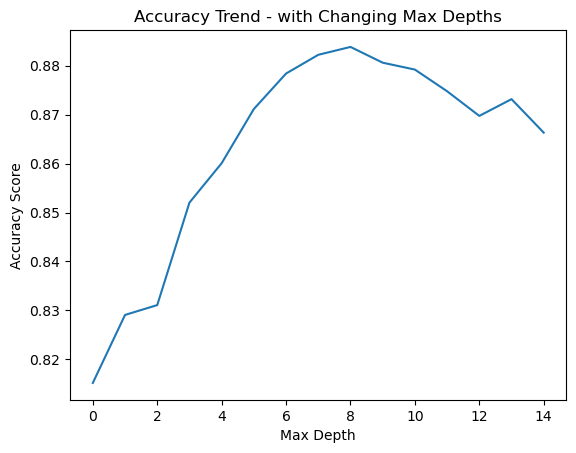

In [26]:
# Let's chart our accuracies to see trend in accuracy score

plt.title("Accuracy Trend - with Changing Max Depths")
plt.plot(accuracies)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")

Over a few iterations, the "best" max_depth fluctuated - but was always higher than 5.